## Multiple Linear Regression

## Toyota Coralla Data

### Consider only the below columns and Prepare a Prediction Model for Predicting Price.

- **[ Price, Age_08_04, KM, HP, cc, Doors, Gears, Quarterly_Tax, Weight ]**


## 1. Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Importing Data

In [2]:
toyota_coralla_data=pd.read_csv('ToyotaCorolla.csv')
toyota_coralla_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


#### Extracting Required Features

In [3]:
toyota_data=toyota_coralla_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## 3. Data Understanding

### 3.1 Initial Analysis

In [4]:
toyota_data.shape

(1436, 9)

In [5]:
toyota_data.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [6]:
toyota_data.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [7]:
toyota_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


### 3.2 ASSUMPTIONS CHECK

#### 1. Normality Check

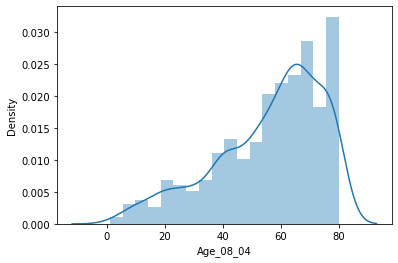

In [8]:
sns.distplot(toyota_data['Age_08_04'])
plt.show()

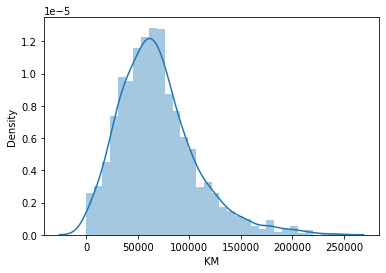

In [9]:
sns.distplot(toyota_data['KM'])
plt.show()

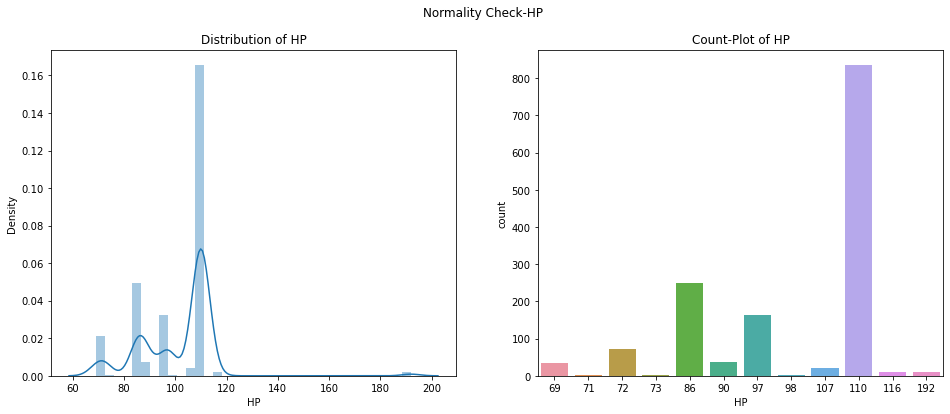

In [10]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(toyota_data['HP'])
plt.title('Distribution of HP')
plt.subplot(1,2,2)
sns.countplot(toyota_data['HP'])
plt.title('Count-Plot of HP')
plt.suptitle('Normality Check-HP')
plt.show()

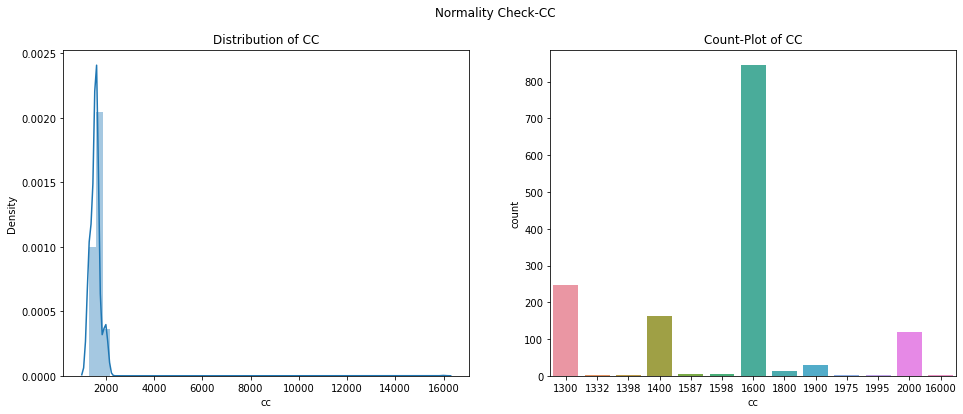

In [11]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(toyota_data['cc'])
plt.title('Distribution of CC')
plt.subplot(1,2,2)
sns.countplot(toyota_data['cc'])
plt.title('Count-Plot of CC')
plt.suptitle('Normality Check-CC')
plt.show()

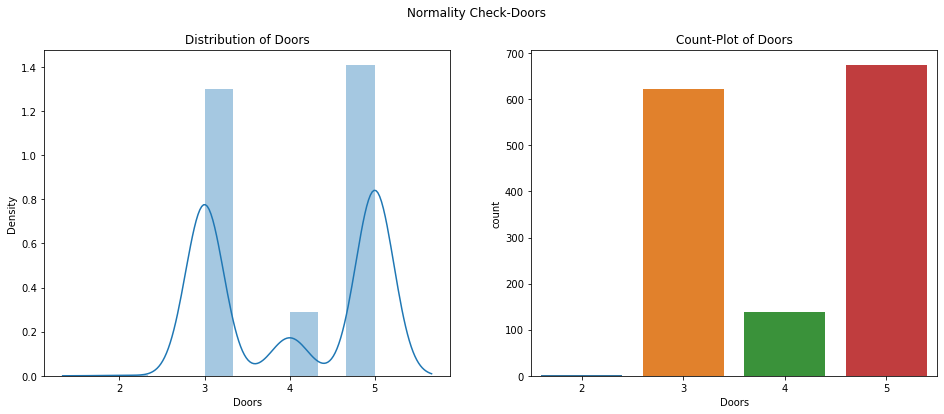

In [12]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(toyota_data['Doors'])
plt.title('Distribution of Doors')
plt.subplot(1,2,2)
sns.countplot(toyota_data['Doors'])
plt.title('Count-Plot of Doors')
plt.suptitle('Normality Check-Doors')
plt.show()

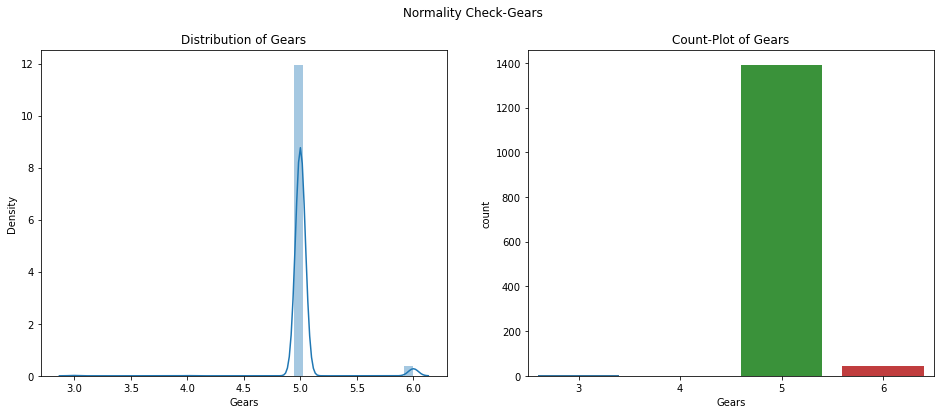

In [13]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(toyota_data['Gears'])
plt.title('Distribution of Gears')
plt.subplot(1,2,2)
sns.countplot(toyota_data['Gears'])
plt.title('Count-Plot of Gears')
plt.suptitle('Normality Check-Gears')
plt.show()

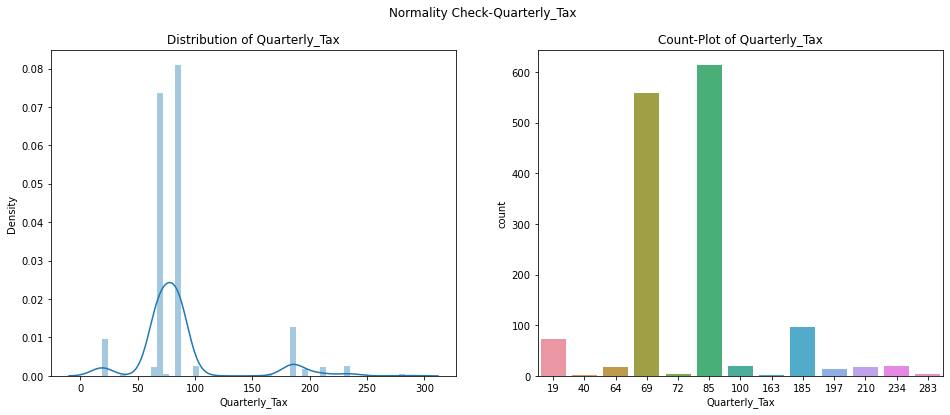

In [14]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(toyota_data['Quarterly_Tax'])
plt.title('Distribution of Quarterly_Tax')
plt.subplot(1,2,2)
sns.countplot(toyota_data['Quarterly_Tax'])
plt.title('Count-Plot of Quarterly_Tax')
plt.suptitle('Normality Check-Quarterly_Tax')
plt.show()

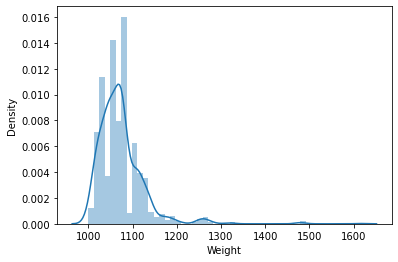

In [15]:
sns.distplot(a=toyota_data['Weight'])
plt.show()

#### Normality Test is Failed

#### 2. Linearity Test

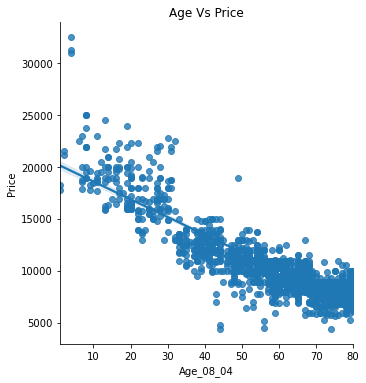

In [16]:
sns.lmplot(x='Age_08_04',y='Price',data=toyota_data)
plt.title('Age Vs Price')
plt.show()

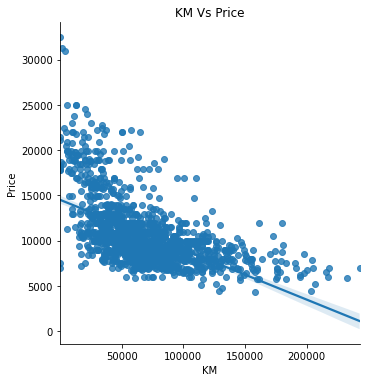

In [17]:
sns.lmplot(x='KM',y='Price',data=toyota_data)
plt.title('KM Vs Price')
plt.show()

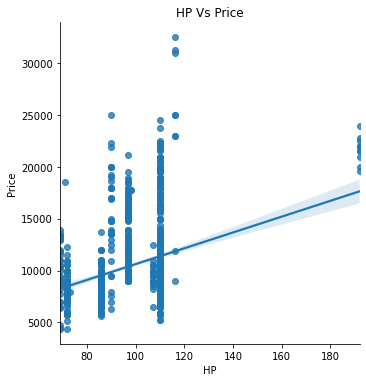

In [18]:
sns.lmplot(x='HP',y='Price',data=toyota_data)
plt.title('HP Vs Price')
plt.show()

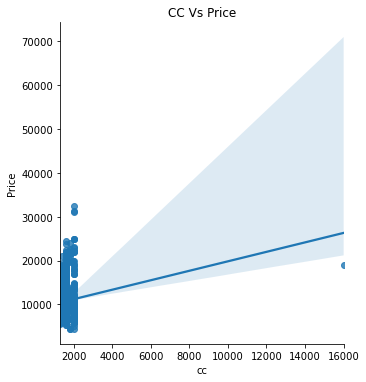

In [19]:
sns.lmplot(x='cc',y='Price',data=toyota_data)
plt.title('CC Vs Price')
plt.show()

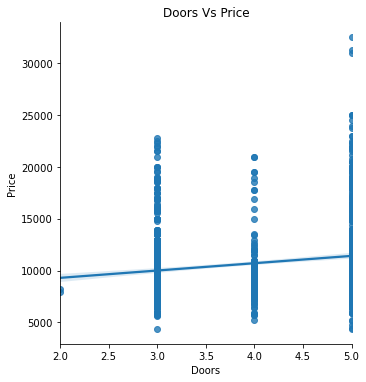

In [20]:
sns.lmplot(x='Doors',y='Price',data=toyota_data)
plt.title('Doors Vs Price')
plt.show()

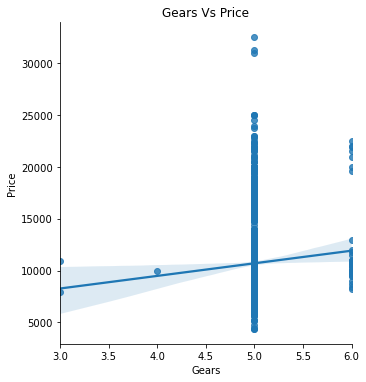

In [21]:
sns.lmplot(x='Gears',y='Price',data=toyota_data)
plt.title('Gears Vs Price')
plt.show()

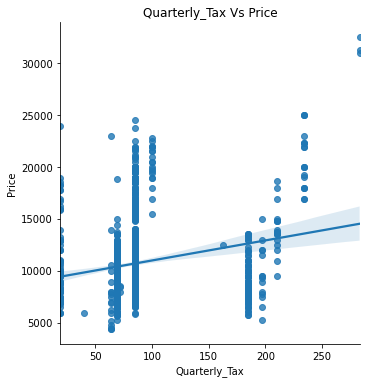

In [22]:
sns.lmplot(x='Quarterly_Tax',y='Price',data=toyota_data)
plt.title('Quarterly_Tax Vs Price')
plt.show()

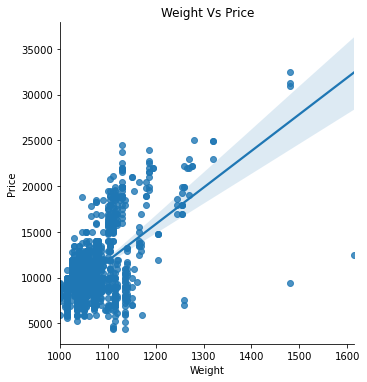

In [23]:
sns.lmplot(x='Weight',y='Price',data=toyota_data)
plt.title('Weight Vs Price')
plt.show()

**All plots in 1 plot using pairplot**

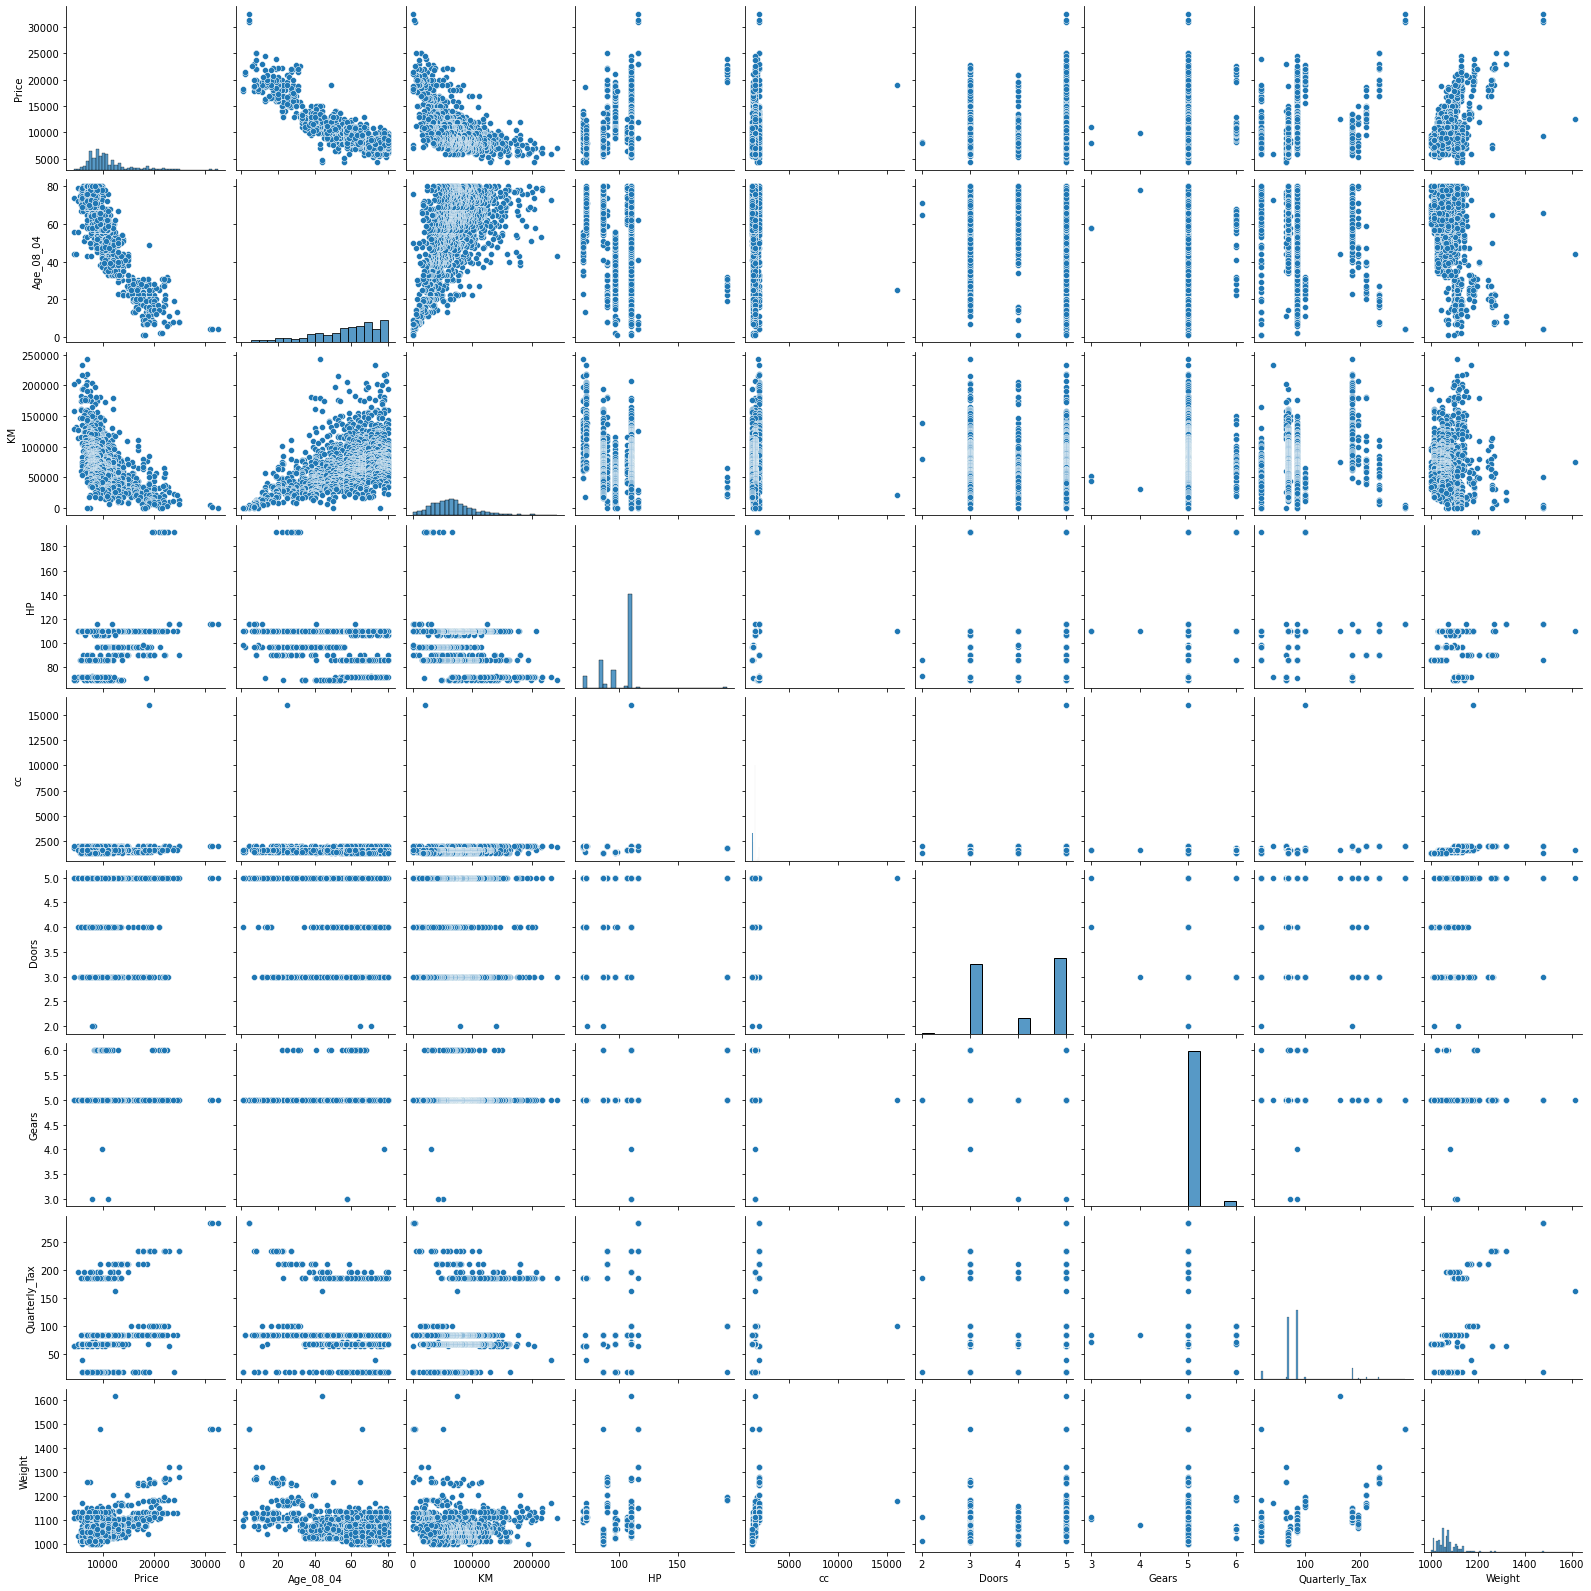

In [24]:
sns.pairplot(toyota_data)
plt.show()

#### Linearity Test Failed

#### 3. Multi-collinearity Check

In [25]:
corr_data=toyota_data.corr().round(2)
corr_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.00,-0.88,-0.57,0.31,0.13,0.19,0.06,0.22,0.58
Age_08_04,-0.88,1.00,0.51,-0.16,-0.10,-0.15,-0.01,-0.20,-0.47
KM,-0.57,0.51,1.00,-0.33,0.10,-0.04,0.02,0.28,-0.03
HP,0.31,-0.16,-0.33,1.00,0.04,0.09,0.21,-0.30,0.09
cc,0.13,-0.10,0.10,0.04,1.00,0.08,0.01,0.31,0.34
Doors,0.19,-0.15,-0.04,0.09,0.08,1.00,-0.16,0.11,0.30
Gears,0.06,-0.01,0.02,0.21,0.01,-0.16,1.00,-0.01,0.02
Quarterly_Tax,0.22,-0.20,0.28,-0.30,0.31,0.11,-0.01,1.00,0.63
Weight,0.58,-0.47,-0.03,0.09,0.34,0.30,0.02,0.63,1.00


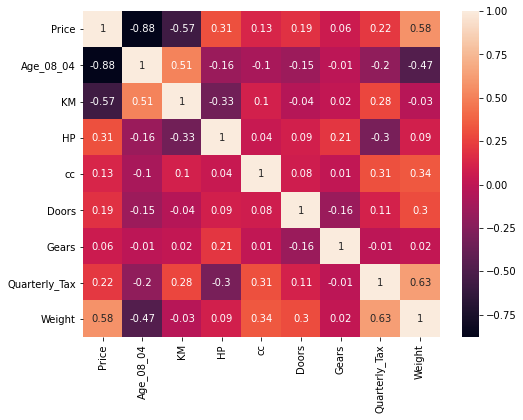

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_data,annot=True)
plt.show()

#### No Multi-collinearity in the data

#### 4. Auto-Regression

No time based inputs

#### 5. Homoskedasticity Check | 6. Zero Residual Mean Check

This can be done post model training.

## 4. Model Building using Sklearn

In [27]:
X=toyota_data.drop('Price', axis=1)
y=toyota_data[['Price']]

In [28]:
X.shape, y.shape

((1436, 8), (1436, 1))

In [29]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, shuffle=True, random_state=10)

In [30]:
X_train.shape, y_train.shape #Training data

((1148, 8), (1148, 1))

In [31]:
X_test.shape, y_test.shape #Testing data

((288, 8), (288, 1))

## 5. Model Training

In [32]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

## 6. Model testing.

In [33]:
y_pred_train=linear_model.predict(X_train)

In [34]:
y_pred_test=linear_model.predict(X_test)

## 7. Model Evaluation

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
mean_squared_error(y_train, y_pred_train) # For training data

1745457.279502512

In [37]:
mean_squared_error(y_test, y_pred_test) # For testing data

2008668.0959386444

In [38]:
mean_absolute_error(y_train, y_pred_train) # For training data

987.5700666767059

In [39]:
mean_absolute_error(y_test, y_pred_test) # For testing data

1060.1947709320546

In [40]:
r2_score(y_train, y_pred_train) # For training data

0.8630428079504427

In [41]:
r2_score(y_test, y_pred_test) # For testing data

0.8631151482116788

#### Homoscadastisity Check

In [42]:
y_pred=linear_model.predict(X) 

In [43]:
resid=y-y_pred # Residuals

In [44]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

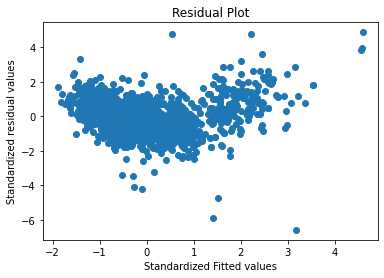

In [45]:
plt.scatter(get_standardized_values(y_pred),
            get_standardized_values(resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#### Homoskedasticity Test Failed

#### Zero Residual Mean Test

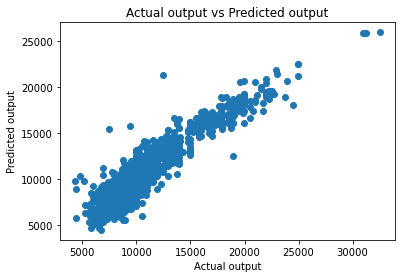

In [46]:
plt.scatter(x=y,y=y_pred,)
plt.title('Actual output vs Predicted output')
plt.xlabel('Actual output')
plt.ylabel('Predicted output')
plt.show()

#### Zero residual Test Failed.